### Student Information
Name: GUZMAN ALVAREZ Michael

Student ID: X1120075

GitHub ID: miguzz

Kaggle name: miguzz

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [50]:
### Begin Assignment Here

# First Part

In [51]:
import pandas as pd
import numpy as np
import nltk
import keras
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [53]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [54]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [55]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [56]:
train_df.head()

,id,text,emotion,intensity
1323,20466,Bayern Munich pitch is horrific,fear,0.542
3001,40174,@KatHeartwell some don't see the difference be...,sadness,0.667
653,10653,"@sippycoups if it hurts too much to eat, i rea...",anger,0.375
2266,30262,#Followback Quote_Soup: Be happy not because e...,joy,0.583
622,10622,@SarahMi40605180 @kaileighhxo sorry to burst t...,anger,0.396


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [57]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import math
import plotly.express as px
import plotly.io as pio # Line needed because I wasn't able to see the graph (related to a bug on jupyter lab)
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

def plot_word_frequency(df, df_name, top=30):
    count_vect = CountVectorizer()
    train_df_counts = count_vect.fit_transform(df['text']) # learn the vocabulary and return document-term matrix
    term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
    term_frequencies_log = []
    for freq in term_frequencies :
        if freq > 0:
            term_frequencies_log.append(math.log(freq))
        else:
            term_frequencies_log.append(freq)

    number_of_terms_to_display = top
    plotly_features_counts_df_log = pd.DataFrame({'term_names' : count_vect.get_feature_names_out(), 'term_frequencies_log' : term_frequencies_log})
    plotly_features_counts_df_log_descending_order = plotly_features_counts_df_log.sort_values(by='term_frequencies_log', ascending=False, ignore_index=True)
    fig = px.bar(plotly_features_counts_df_log_descending_order.loc[:number_of_terms_to_display, :], x='term_names', y='term_frequencies_log', title=f'Frequency of term appearance in {df_name}')
    fig.show()

In [58]:
plot_word_frequency(train_df, 'train_df')

In [59]:
plot_word_frequency(test_df, 'test_df')

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [60]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF_1000 = vectorizer_tfidf.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
# train_data_TFIDF_features_1000.shape

feature_names_tfidf_1000 = TFIDF_1000.get_feature_names_out()
feature_names_tfidf_1000[100:110]

C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


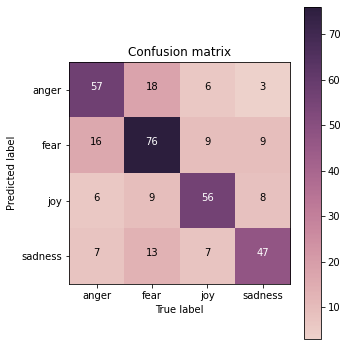

In [61]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

Can you interpret the results above? What do they mean?

The confusion matrix shows a tabular representation of the performance of the classification performed by the DecisionTreeClassifier.

- For anger emotion:
    - we have 57 correctly predicted instances.
    - we have incorrectly predicted instances with 16 fear, 6 joy and 7 sadness
    - In total the model correctly predicted 57 / (57+18+6+3) = 68% instances labelled as anger (recall)
    
- For fear emotion:
    - we have 76 correctly predicted instances.
    - we have incorrectly predicted instances with 18 anger, 9 joy and 13 sadness
    - In total the model correctly predicted 76 / (76+16+9+9) = 69% instances labelled as fear (recall)
    
- For joy emotion:
    - we have 56 correctly predicted instances.
    - we have incorrectly predicted instances with 6 anger, 9 fear and 7 sadness
    - In total the model correctly predicted 56 / (56+6+9+8) = 71% instances labelled as joy (recall)
    
- For sadness emotion:
    - we have 47 correctly predicted instances.
    - we have incorrectly predicted instances with 3 anger, 9 fear and 8 joy
    - In total the model correctly predicted 47 / (47+7+13+7) = 64% instances labelled as sadness (recall)
    
    

We can say that the model performs well in predicting the emotion of joy.
The emotion of fear has more classification errors, but also the highest number of total instances. 
Finally, the emotions of anger and sadness have balanced classification errors.

Note: After reading the documentation for the confusion_matrix function, it seems that the x and y axes are inverted.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


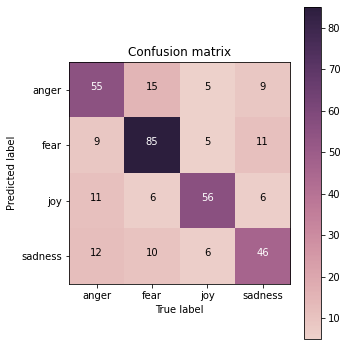

In [62]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
MNB_model = MultinomialNB()

## training!
MNB_model = MNB_model.fit(X_train, y_train)

## predict!
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

- In terms of accuracy we have :
    - Decision Tree : 68%
    - Naive Bayes : 70%
- In terms of Precision, recall and F1-score, we have :
    - Both model show varying performance across different classes.
    - f1-score ranges from 0.67 to 0.71. (DecisionTreeClassifier)
    - f1-Score ranges from 0.63 to 0.75. (MultinomialNB)
    - MultinomialNB demonstrates a more balanced performance with competitive precision and recall values, making it a preferable choice.

- For the decision tree model :
    - We can interpret these differences by considering that the decision tree model is overfitted, as suggested by the 99% learning accuracy. The model has some difficulty generalizing to unseen data when fitted to a small dataset. This is related to the fact that the decision tree can capture complex relationships in the training data, which can lead to fit noise and specificities that do not generalize well. We could also have applied certain techniques to mitigate overfitting, such as specifying tree depth or number of trees, etc...

- For the Naive Bayes model :
    - The Naive Bayes model assumes independence between features. This can be advantageous when the independence assumption holds reasonably well. For example, in this case, it reduces the risk of over-fitting. This model takes a different approach to the decision tree model, as it is based on probabilistic principles that make it robust to noisy data.
    
Overall, the differences in performance can be linked to the inherent characteristics of each model.

---
### ** >>> Exercise 6 (Take home): **  

In [63]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1323       fear
3001    sadness
653       anger
2266        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)              

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.361472,1.324152,0.420749,1.263990
1,1,0.649599,0.973107,0.671470,0.905037
2,2,0.798229,0.569742,0.694524,0.767007
3,3,0.849433,0.410515,0.700288,0.778899
4,4,0.882646,0.325945,0.668588,0.821289
5,5,0.905895,0.277635,0.674352,0.840696
6,6,0.922779,0.225140,0.671470,0.952067
7,7,0.937448,0.194899,0.671470,0.975452
8,8,0.950733,0.158635,0.674352,1.025000
9,9,0.960144,0.139446,0.677233,1.121599


Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

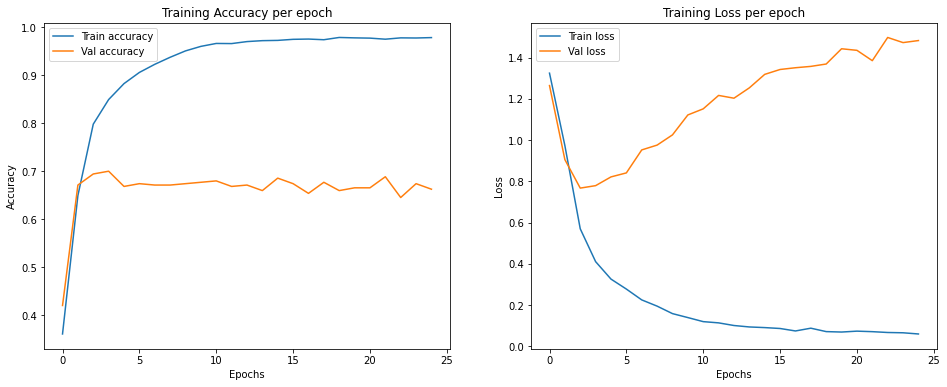

In [73]:
# Answer here
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(training_log['accuracy'], label='Train accuracy')
plt.plot(training_log['val_accuracy'], label='Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_log['loss'], label='Train loss')
plt.plot(training_log['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per epoch')
plt.legend()

plt.show()

- Train Accuracy per Epoch:
    - It indicates that the model is learning and improving its performance on the training data over epochs. It also suggest that while the model is learning well on the training data, it fails to generalize this learning to the validation set.
    
- Training Loss per Epoch:
    - It indicates that the model is fitting the training data well, with the loss decreasing as the model learns. However, after epoch 3, the validation loss starts increasing (from 0.8 to 1.5) which suggests overfitting.
    
Overfitting occurs when the model learns the training data too well which includes its noise and specificities that do not generalize to new data. In this case, the increasing gap between training and validation accuracy after raching 0.7 and the rising validation loss after epoch 3 suggest overfitting.

---
### ** >>> Exercise 7 (Take home): **  

In [75]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


To represent sentence data, we can calculate the average of word vectors in the sentence. We can also sum up all word vectors to create a sentence vector. Here for the example I perform the averaging representation for each sentence in the dataset.

In [76]:
def calculate_average_word_vector_representation(sentence):
    valid_words_in_sentence = []
    for word in sentence:
        if word in word2vec_model.wv:
            valid_words_in_sentence.append(word)
        else:
            pass
    if len(valid_words_in_sentence) != 0:
        word_vectors_for_valid_words = [word2vec_model.wv[word] for word in valid_words_in_sentence]
        word_vectors_array = np.array(word_vectors_for_valid_words)
        sentence_representation_mean = word_vectors_array.mean(axis=0)
        return sentence_representation_mean
    else:
        return np.zeros(100)
    
wv_average_sentences_representation = np.array([calculate_average_word_vector_representation(s) for s in train_df['text_tokenized']])

For each sentence, we have its average representation in a 100-dimensional space. Here, we use word vectors to represent the sentence data (sentence meaning based on the 100 dimensions).
For example, for the first sentence, we have :

In [78]:
wv_average_sentences_representation[0]

array([-0.14324212,  0.37934098, -0.04994119,  0.09612987, -0.06918633,
       -0.5450451 ,  0.09793703,  0.60302246, -0.20098993, -0.38631707,
        0.15357715, -0.342137  ,  0.00245668,  0.0625397 ,  0.23654881,
       -0.27718008,  0.0399902 , -0.09374447, -0.0635108 , -0.5136516 ,
        0.03189294, -0.13444552,  0.05741642, -0.3029959 , -0.2418242 ,
        0.0012757 , -0.09736178, -0.06580774, -0.00716659, -0.06696457,
        0.13352385, -0.07011281,  0.06536047, -0.20554718, -0.05367426,
        0.25023714,  0.11340339, -0.04657679, -0.15007105, -0.39199555,
        0.14287607,  0.00583016, -0.07442982, -0.09756583,  0.16199294,
       -0.16334116, -0.2852468 , -0.16544548,  0.18278793,  0.14508298,
        0.14749874, -0.10104278, -0.10655655, -0.0288389 , -0.0955389 ,
        0.05693467,  0.33730057,  0.04581603, -0.17282513,  0.1137172 ,
        0.02609521, -0.0231453 ,  0.08247895,  0.00984992, -0.20229259,
        0.22893652,  0.00273032,  0.2573505 , -0.24825127,  0.14

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

  File "C:\Users\micha\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


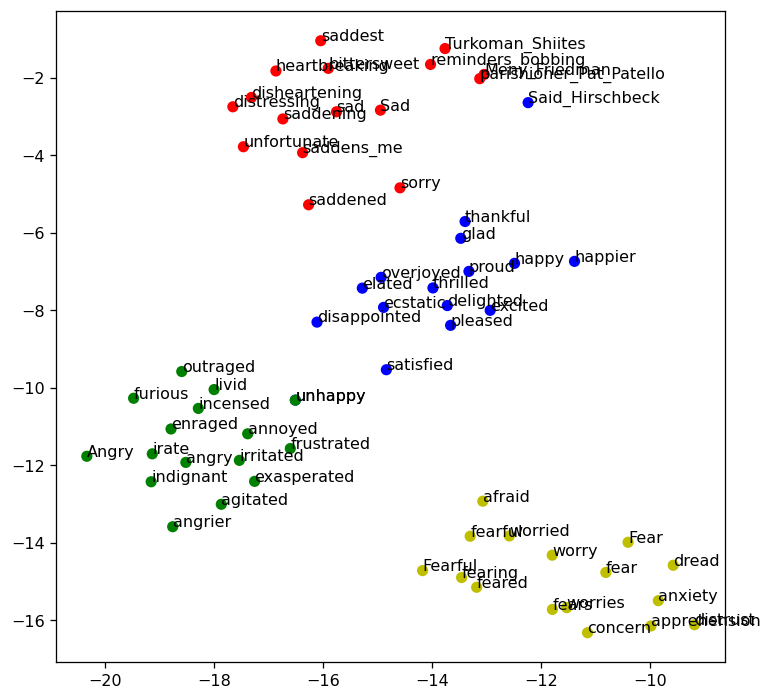

In [80]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model # wv (word vector)

## prepare training word vectors
size = 200
target_size = len(target_words) # 64 = (15*4) + 4 
all_word = list(model.index_to_key) # 3 000 000
word_train = target_words + all_word[:size] # 224
X_train = model[word_train] # (224, 300) it means 300 dimensions for each word i guess

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train) # (224, 2)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Third part

- For this part, you can refer to two notebooks :
    - kaggle_formatted_data.ipynb : Includes all the steps performed to format the raw data into tabular format.
    - kaggle_main.ipynb : Includes all pre-processing steps and the model used to perform the classification task.